In [42]:
# Enter your information below
Student.Name = 'Laurelyne Barbier'
Student.Number = 67493288
sprintf('GEOS 300 Assignment Submission for %s: %s',Student.Name,Student.Number)

[1] "GEOS 300 Assignment Submission for Laurelyne Barbier: 67493288"

In [43]:
install.packages("latex2exp")
library("tidyverse")
library("ggplot2")
library("reshape2")
library("latex2exp")
library("patchwork")
library("tidyr")
library("knitr")
library("plyr")
library("lubridate")
library("zoo")
library("readr")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Question 1

Download your data and print descriptive statistics for all columns. How do maximum and minimum air temperature at 0.4 m compare to those at 2.0 m?

In [44]:
data_url='https://raw.githubusercontent.com/GEOS300/AssignmentData/main/CA_DBB_DailyData/20160820.txt'
df <- read.csv(file = data_url,na.strings="-9999")

df$TIMESTAMP <- as.POSIXct(df$Date.Time..PST.,format = "%Y-%m-%d %H:%M:%S")

head(df)
summary(subset(df,select = -c(TIMESTAMP, Date.Time..PST.)))

,Date.Time..PST.,T_0.4m..K.,T_2m..K.,u_0.4m..m.s.1.,u_2m..m.s.1.,Rn..W.m.2.,u.w...m2.s.2.,w.T...K.m.s.1.,w.rho_v...g.m.2.s.1.,w.rho_CO2...micromol.m.2.s.1.,w.rho_CH4...microåmol.m.2.s.1.,Pa..kPa.,PPFD..micromol.m.2.s.1.,rv,TIMESTAMP
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
1,2016-08-20 00:30:00,284.47,287.65,0.00,0.24,-20.20,-0.0128,-0.0114,-0.0016,2.0350,0.1379,101.260,101.260,0.01449635,2016-08-20 00:30:00
2,2016-08-20 01:00:00,284.22,286.93,0.20,0.38,-18.13,-0.0057,0.0060,0.0027,2.0026,0.1353,101.255,101.255,0.01379902,2016-08-20 01:00:00
3,2016-08-20 01:30:00,283.30,285.94,0.07,0.25,-16.09,-0.0048,0.0029,0.0022,1.9728,0.1329,101.250,101.250,0.01309974,2016-08-20 01:30:00
4,2016-08-20 02:00:00,283.04,285.35,0.28,0.43,-15.31,-0.0040,0.0047,0.0024,1.9337,0.1298,101.255,101.255,0.01266678,2016-08-20 02:00:00
5,2016-08-20 02:30:00,282.56,284.64,0.00,0.11,-13.29,-0.0011,-0.0021,0.0006,1.8984,0.1271,101.260,101.260,0.01209807,2016-08-20 02:30:00
6,2016-08-20 03:00:00,282.17,284.38,0.00,0.24,-13.87,-0.0186,0.0060,0.0018,1.8647,0.1246,101.255,101.255,0.01192066,2016-08-20 03:00:00


   T_0.4m..K.       T_2m..K.     u_0.4m..m.s.1.    u_2m..m.s.1.   
 Min.   :282.0   Min.   :284.0   Min.   :0.0000   Min.   :0.0600  
 1st Qu.:285.6   1st Qu.:287.5   1st Qu.:0.1250   1st Qu.:0.2725  
 Median :294.6   Median :294.0   Median :0.4800   Median :1.1800  
 Mean   :293.6   Mean   :293.2   Mean   :0.6992   Mean   :1.1579  
 3rd Qu.:301.0   3rd Qu.:299.0   3rd Qu.:1.2825   3rd Qu.:1.9975  
 Max.   :305.4   Max.   :301.4   Max.   :1.5400   Max.   :2.5000  
   Rn..W.m.2.     u.w...m2.s.2.       w.T...K.m.s.1.      w.rho_v...g.m.2.s.1.
 Min.   :-63.13   Min.   :-0.091700   Min.   :-0.013400   Min.   :-0.003000   
 1st Qu.:-20.36   1st Qu.:-0.055475   1st Qu.:-0.000925   1st Qu.: 0.000675   
 Median : 22.89   Median :-0.017000   Median : 0.010800   Median : 0.009750   
 Mean   :171.29   Mean   :-0.031598   Mean   : 0.052331   Mean   : 0.025848   
 3rd Qu.:404.40   3rd Qu.:-0.004675   3rd Qu.: 0.130525   3rd Qu.: 0.051800   
 Max.   :590.67   Max.   :-0.000600   Max.   : 0.176900  

At 0.4m, the minimum temperature is 282.0 K while the maximum temperature is 305.4 K. The minimum and maximum temperatures at 2m are 284.0 K and 301.4 K respectively. The minimum temperature is thus lower while the maximum temperature is higher at 0.4m. The air at 2m experiences a narrower range of temperatures than the air at 0.4m, by a few degrees.

## Question 2

Convert the air temperature values at 0.4 m and 2.0 m to potential temperature. Recalculate the descriptive statistics for the potential temperatures at 0.4 and 2m; how does this adjustment impact the values?

In [45]:
DALR <- -0.01 #Km^-1
z0.4 <- 0.4 #m
z2 <- 2 #m

df2 <- select(df, T_0.4m..K., T_2m..K.) |>
    mutate(theta0.4 = (T_0.4m..K. + DALR*z0.4), theta2 = (T_2m..K. + DALR*z2))

summary(df2)

   T_0.4m..K.       T_2m..K.        theta0.4         theta2     
 Min.   :282.0   Min.   :284.0   Min.   :282.0   Min.   :284.0  
 1st Qu.:285.6   1st Qu.:287.5   1st Qu.:285.5   1st Qu.:287.4  
 Median :294.6   Median :294.0   Median :294.6   Median :294.0  
 Mean   :293.6   Mean   :293.2   Mean   :293.6   Mean   :293.1  
 3rd Qu.:301.0   3rd Qu.:299.0   3rd Qu.:301.0   3rd Qu.:299.0  
 Max.   :305.4   Max.   :301.4   Max.   :305.4   Max.   :301.4  

The adjustment has no impact when staying so close to the ground. Since the dry adiabatic lapse rate is -0.01, the difference between the temperature and the potential temperature is not even noticeable when temperatures are rounded to the tenth of a degree.

## Question 3

From the data-set provided, calculate H, LE and FCO2 from the covariances of w'T' bar, w'rhov' bar and u'rhoCO2' bar respectively. You can assume that the heat capacity of air is 0.0012 MJ m-3 K-1. You can estimate the density of air using the Ideal Gas Law and you can estimate the latent heat of vaporization following Equation 2. Here, R
is the ideal gas constant (8.31446261815324 Pa m^3 mol^-1 K^-1), T is temperature (in Kelvin!), P is air pressure, V is volume, n is the amount of the gas in mols; with n=m/M, where m is mass and M is the molar mass. The molar mass of air is 0.028964 kg mol^-1

Following Yao & Rogers (1996), the latent heat of vaporization of water (Lv in Jg^-1) can be approximated as a function of temperature (T in degC) using a third order polynomial function: Lv = 2500.8 - 2.36T - 0.0016T^2 - 0.00006T^3

In [71]:
Ca <-  0.0012*10e+6 # J m-3 K-1
ca <- 1.01*1000 #J kg^-1 K-1
R <- 8.31446261815324/1000 # kPa m^3 mol^-1 K^-1
M <- 0.028964 #kg mol^-1

df3 <- df|>
    mutate(rho = Pa..kPa.*M/R*T)|> #add density in kg m^-3
    mutate(H = rho*ca*w.T...K.m.s.1.)|> #add H in W m^-2
    mutate(Lv = 2500.8 - 3.36*(T_2m..K.-273.15) - 0.0016*(T_2m..K.-273.15)^2 - 
           0.00006*(T_2m..K.-273.15)^3)|> #add Lv in J g^-1
    mutate(LE = Lv*w.rho_v...g.m.2.s.1.)|> #add LE in W m^-2
    mutate(FCO2 = w.rho_CO2...micromol.m.2.s.1.) #add FCO2 in micromol m^-2 s^-1

q3 <- select(df3, H, Lv,LE,FCO2)|>
    map_dfr(mean)
message("The average fluxes are:")
q3

The average fluxes are:



H,Lv,LE,FCO2
<dbl>,<dbl>,<dbl>,<dbl>
18626.16,2432.235,62.37114,0.3029938


## Question 4

Create a graph with time of day on the x-axis and the three measured flux densities of the surface energy balance (Rn, H, LE) on the 
y-axis. Briefly discuss their diurnal course. Do H and LE sum to Rn? If not, why?

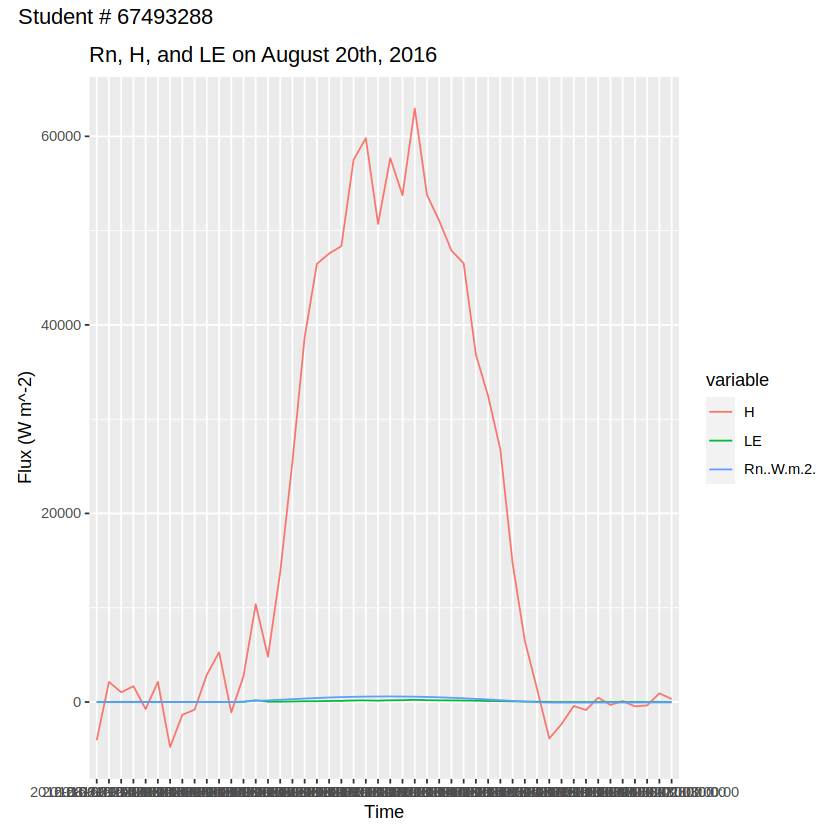

In [55]:
plot_flux_densities <- melt(df3[,c('Date.Time..PST.','H','LE','Rn..W.m.2.')],
  id="Date.Time..PST.")

p1 <- ggplot(plot_flux_densities, aes(x = Date.Time..PST., y = value, group = variable)) +
  geom_line(aes(color = variable)) +
  ggtitle("Rn, H, and LE on August 20th, 2016")+
  labs(y = "Flux (W m^-2)",x='Time')

p1 + plot_annotation(sprintf('Student # %i',Student.Number))

H and LE do not add up to Rn. 

## Question 5
For 16:00, Calculate H based on the aerodynamic method using the simultaneously measured profiles of ubar and Tbar. How does the value of H compare to H in your answer to question 2? Why could it differ?

In [69]:
df5 <- filter(df3, Date.Time..PST. == "2016-08-20 16:00:00")|>
      mutate(theta0.4 = (T_0.4m..K. + DALR*z0.4), theta2 = (T_2m..K. + DALR*z2))

rho2 <- pull(df5, rho) #kg m^-3
k <- 0.41 #dimensionless
deltau <- pull(df5, u_2m..m.s.1.) - pull(df5, u_0.4m..m.s.1.) #m s^-1
ca <- 1.01*1000 #J kg^-1 K-1
deltatheta <- pull(df5, theta2) - pull(df5, theta0.4) #K
lnz2_z1 <- log(2/0.4)

q5 <- (-rho2*k^2*deltau*ca*deltatheta)/lnz2_z1^2 #W m^-2
message("H in W m^-2 is")
q5

H in W m^-2 is



[1] 36243.6

The value of H using the aerodynamic method is almost twice as great as the value of H calculted in Q2.

## Question 6
Using the covariances and the profile measurements, calculate the eddy diffusivities for sensible heat KH and momentum KM at 16:00. Is Reynold’s analogy fulfilled or not at 16:00?

## Question 7
For 16:00, calculate the Obukhov-length L and the stability parameter. Does zeta qualitatively agree with Rf? Is zeta=z/L really indicating "neutral" as assumed in using the aerodynamic method above?

In [14]:
df7 <- filter(df3.1, Date.Time..PST. == "2016-08-20 16:00:00")
df7

Date.Time..PST.,T_2m..K.,w.T...K.m.s.1.,w.rho_v...g.m.2.s.1.,w.rho_CO2...micromol.m.2.s.1.,Pa..kPa.,Rn..W.m.2.,rho,H,Lv,LE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2016-08-20 16:00:00,301.4,0.1037,0.0581,-0.7534,100.975,332.96,8.234179e-05,0.1024661,2403.25,139.6288


## Question 8
In the process of photosynthesis, energy is extracted from photons in the PAR range. To assimilate one mole of CO2, it requires an energy of 469 kJ. The same amount is released back during respiration (metabolism, decomposition of organic matter). We call this energy flux density the net biochemical energy storage deltaP. Calculate deltaP at 13:00 in Wm^-2. At 13:00, what fraction of Rn is used up in the process of photosynthesis? Is deltaP a relevant term in the surface energy balance of this bog or not?

In [41]:
Ca <-  0.0012*10e+6 # J m-3 K-1
ca <- 1.01*1000 #J kg^-1 K-1
R <- 8.31446261815324/1000 # kPa m^3 mol^-1 K^-1
M <- 0.028964 #kg mol^-1

df8 <- df|>
    mutate(rho = Pa..kPa.*M/R*T)|> #add density in kg m^-3
    mutate(H = rho*ca*w.T...K.m.s.1.)|> #add H in W m^-2
    mutate(Lv = 2500.8 - 3.36*(T_2m..K.-273.15) - 0.0016*(T_2m..K.-273.15)^2 - 
           0.00006*(T_2m..K.-273.15)^3)|> #add Lv in J g^-1
    mutate(LE = Lv*w.rho_v...g.m.2.s.1.) #add LE in W m^-2

df8

ERROR: Error in parse(text = x, srcfile = src): <text>:12:36: unexpected ','
11:     mutate(LE = Lv*w.rho_v...g.m.2.s.1.)|> #add LE in W m^-2
12:     mutate(deltaP = Rn..W.m.2. - (H,
                                       ^


## Question 9
Determine the average carbon dioxide (CO2) flux density between the bog and the atmosphere for this day and convert it to gCO2 m^-2 day^-1. Is the surface a net sink or net source for atmospheric CO2 on this day? Note: the molar mass of CO2 is 44.01 gmol^-1

In [37]:
df9 <- df|>
    select(w.rho_CO2...micromol.m.2.s.1.)|>
    map_dfr(mean)|> #micromol m^-2 s^-1
    mutate(massco2flux = w.rho_CO2...micromol.m.2.s.1.*44.01*86400/1e+6)|> #convert to mass flux in g m^-2 d^-1
    pull(massco2flux)
message("The carbon dioxide flux between the bog and the atmosphere for this day is, in gm^-2d^-1")
df9

The carbon dioxide flux between the bog and the atmosphere for this day is, in gm^-2d^-1



[1] 1.152123

Since the flux is positive, this suggests that the surface is a net source of atmospheric CO2 on August 20th, 2016.